# Import neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import zipfile
from pathlib import Path
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tqdm import tqdm
import plotly.express as px
import random
import plotly.graph_objects as go
from pathlib import Path
from typing import Any

for dirname, _, filenames in Path("../data/raw/").walk():
    for file in filenames:
        if Path(file).suffix == ".zip":
            print(Path(dirname / file))

../data/raw/test1.zip
../data/raw/train.zip


# Extracting the datasets to working folders

In [2]:
with zipfile.ZipFile('../data/raw/train.zip', 'r') as zip_ref:
    zip_ref.extractall('../data/intermediate/train')

with zipfile.ZipFile('../data/raw/test1.zip', 'r') as zip_ref:
    zip_ref.extractall('../data/intermediate/test1')

# Setup the directories

In [3]:
train_dir = Path("../data/intermediate/train/train")
test_dir = Path("../data/intermediate/test1/test1")

# Load and pre-process the images

In [4]:
def load_images(folder: Path, img_size: tuple[int, int] = (64, 64), sample_count: int = 20, label_filter: str | None = None):
    images = []
    labels = []

    folder_path = folder

    if label_filter:
        filenames = list(folder_path.glob(f"*{label_filter}*"))
    else:
        filenames = list(folder_path.iterdir())

    random.shuffle(filenames)
    for img_path in filenames[:sample_count:]:
        try:
            img = cv2.imread(str(img_path))
            img = cv2.resize(img, img_size)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = img / 255.0
            images.append(img)
            labels.append(0 if 'cat' in str(img_path) else 1)
        except (cv2.error, IOError, ValueError, MemoryError) as e:
            print(f"Error loading image {img_path}: {e}")
        except FileNotFoundError:
            print(f"Image not found: {img_path}")

    return np.array(images), np.array(labels)

# Visualize images with labels

In [6]:
def visualize_images(images: np.ndarray, labels: np.ndarray):
    fig, axes = plt.subplots(4, 5, figsize=(15, 12))
    axes = axes.flatten()

    for i, img in enumerate(images):
        axes[i].imshow(img)
        axes[i].set_title('Cat' if labels[i] == 0 else 'Dog')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Load and visualize images

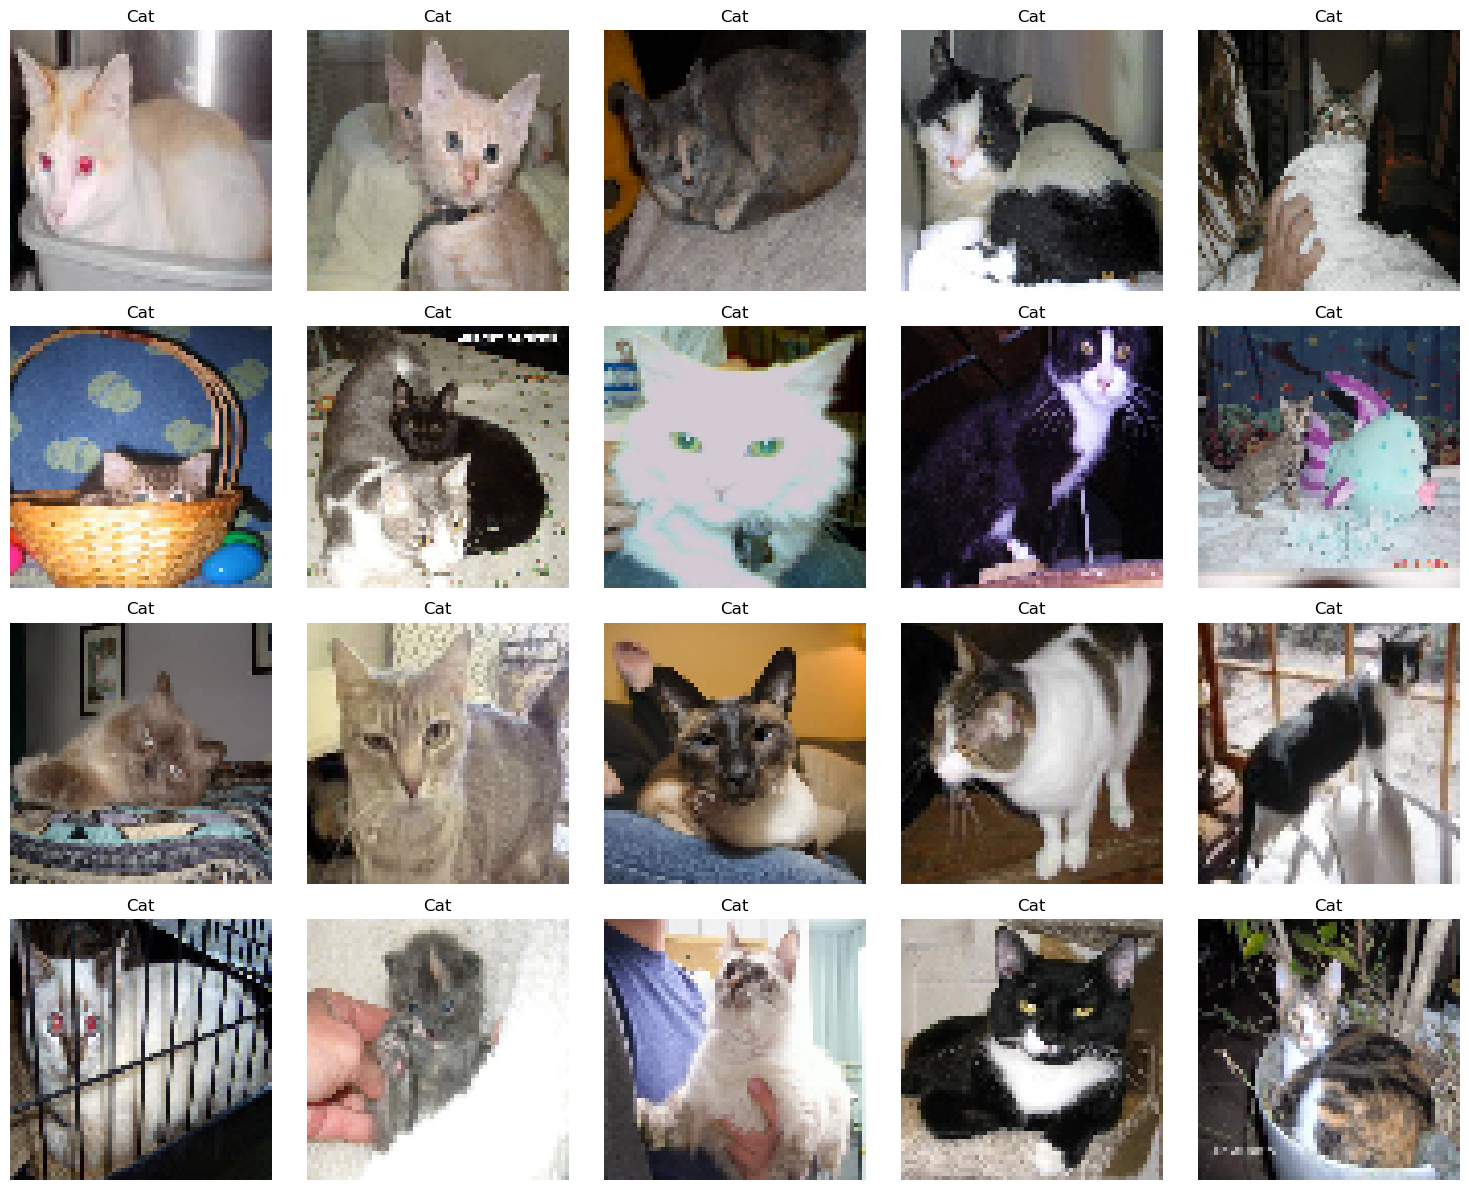

In [7]:
cat_images, cat_labels = load_images(train_dir, sample_count=20,  label_filter="cat")
visualize_images(cat_images, cat_labels)

# Load and visualize dog images

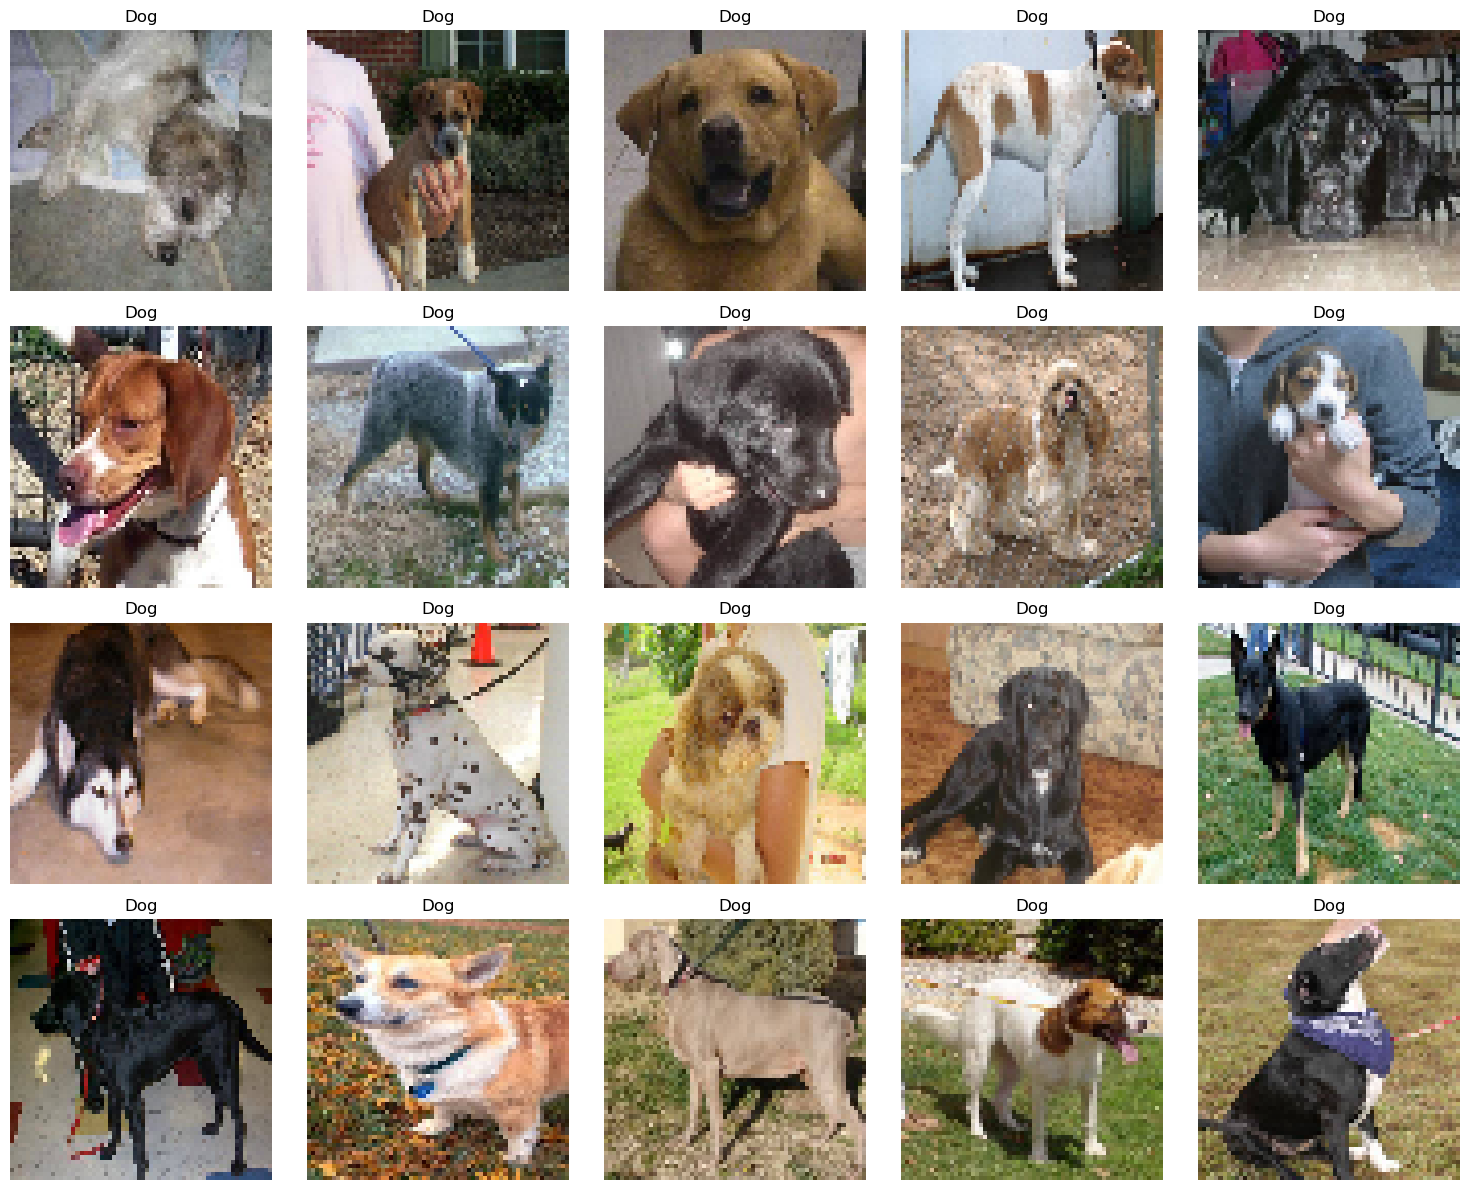

In [8]:
dog_images, dog_labels = load_images(train_dir, sample_count=20, label_filter="dog")
visualize_images(dog_images, dog_labels)

# Load and visualize both cat and dog images

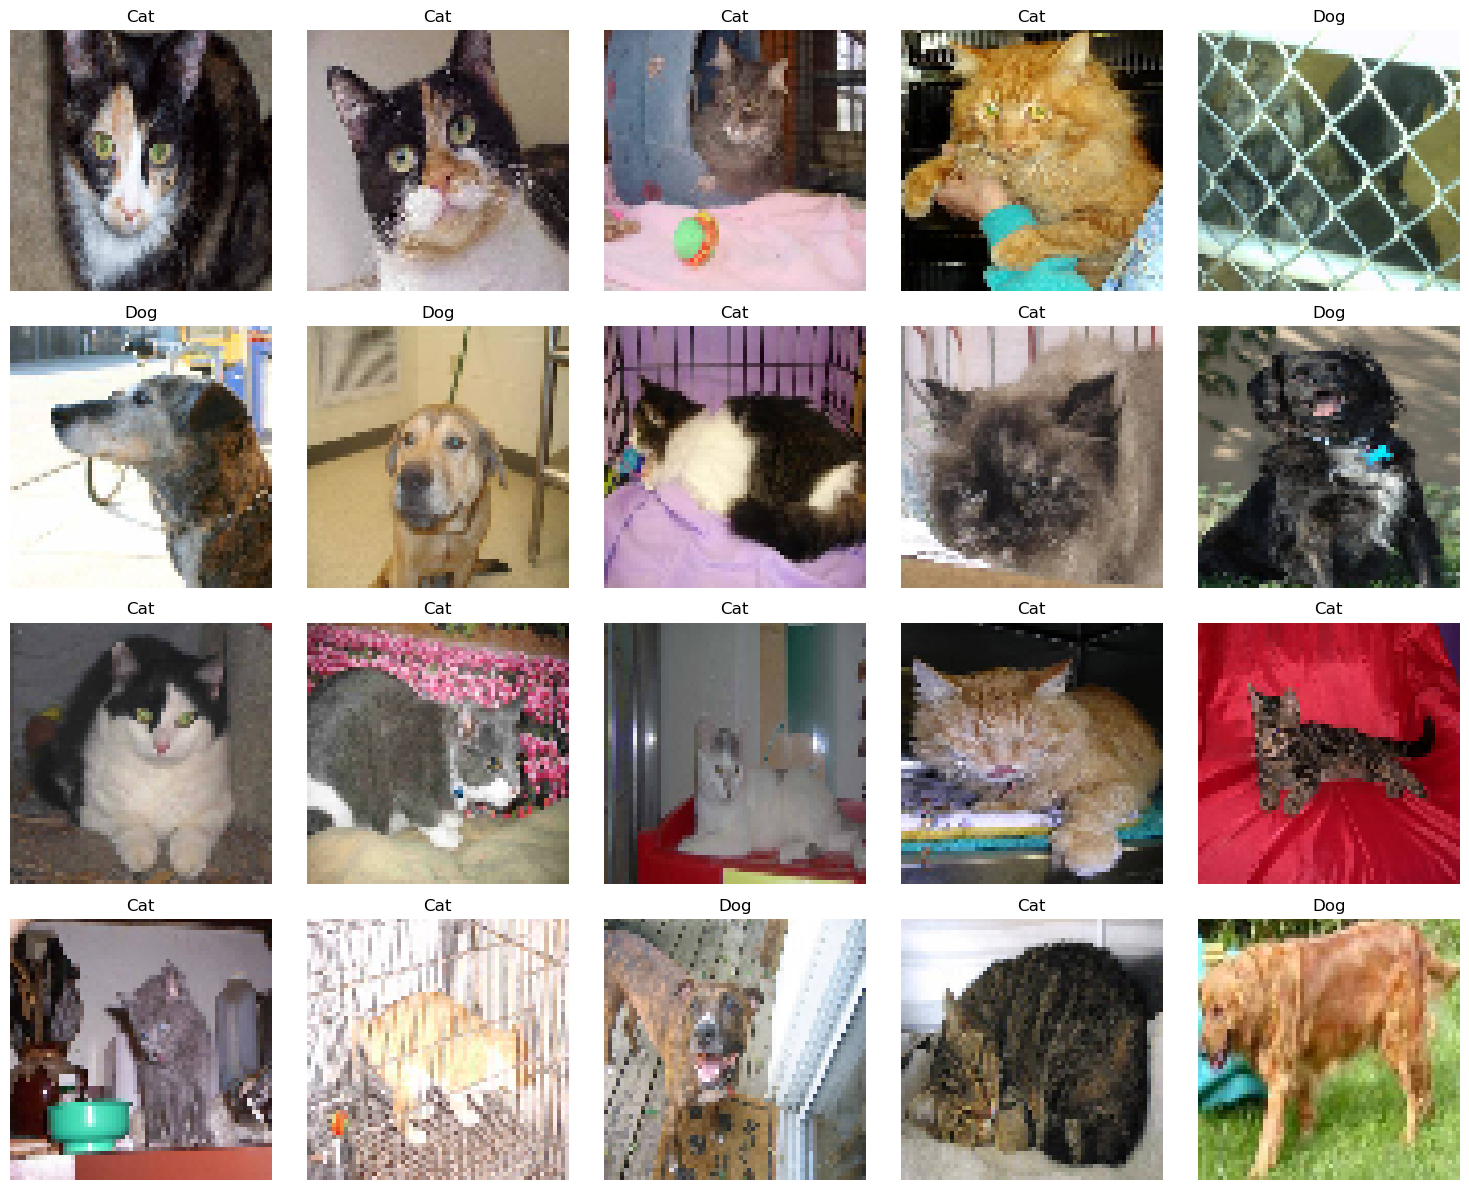

In [9]:
all_images, all_labels = load_images(train_dir, sample_count=20)
visualize_images(all_images, all_labels)